In [178]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
#cargar csv desde MyDrive/proyecto_beca
import pandas as pd

#becas_sbu_2023
becas = pd.read_csv('drive/MyDrive/proyecto_beca/becas_final_nonum_nopca.csv')

In [180]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
becas.nunique()

,0
carrera,119
unidad_academica,13
fuente_de_ingreso_grupo_familiar,6
otorgada_conectividad_dispositivo,4
otorgada_comedor,4
otorgada_discapacidad,4
otorgada_escalonada_por_tramos,4
otorgada_identidades_plurales,4
otorgada_jardin_maternal,4
otorgada_jovenes_de_pueblos_originarios_y_escuelas_rurales,3


In [181]:
# Tamaño de dataset becas
print(f"({becas.shape[0]},{becas.shape[1]})")


(2034,78)


# Normalización de 0 a 100 (Antes del encoding)

distancia mas de 1000 (max 2900)

cantidad_de_habitaciones_en_la_vivienda

cantidad_de_personas_que_comparten_la_vivienda

dispone_de_servicio_de_agua_potable_en_el_interior

edad (max 65)

puntaje_social (0-100)

puntaje_academico (0-10)

porcentaje_materias_aprobadas (0-100)

total_de_integrantes_del_grupo_familiar

total_de_menores_de_18_anos_y_mayores_de_65_anos

monto_total_de_ingresos_del_grupo_familiar

monto_de_ingreso_percapita_del_grupo_familiar


In [182]:
# copia de dataset para normalizar
# becas = becas.copy()

# Drop codigo persona
becas = becas.drop('codigo_persona', axis=1)
becas = becas.drop('carrera', axis=1)

In [183]:
# Contar columnas numericas y no numericas
print(f"Columnas numericas: {len(becas.select_dtypes(include=['number']).columns)}")
print(f"Columnas no numericas: {len(becas.select_dtypes(exclude=['number']).columns)}")

Columnas numericas: 15
Columnas no numericas: 61


In [184]:
# Contar columnas numericas que tengan menos de 5 valores unicos
# print(f"Columnas numericas con menos de 5 valores unicos: {len(becas_n.select_dtypes(include=['number']).nunique()[becas_n.select_dtypes(include=['number']).nunique() < 5].index)}")

In [185]:
# Mostrar valores unicos solo de columnas no numericas
cols = becas.select_dtypes(exclude=['number']).columns
becas[cols].nunique()

,0
unidad_academica,13
fuente_de_ingreso_grupo_familiar,6
otorgada_conectividad_dispositivo,4
otorgada_comedor,4
otorgada_discapacidad,4
otorgada_escalonada_por_tramos,4
otorgada_identidades_plurales,4
otorgada_jardin_maternal,4
otorgada_jovenes_de_pueblos_originarios_y_escuelas_rurales,3
otorgada_residencia_universitaria,4


In [186]:
df = becas.copy()

In [187]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=["number"]).columns

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Aplicar normalización solo a columnas numéricas
df[columnas_numericas] = scaler.fit_transform(df[columnas_numericas])
# df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=columnas_a_normalizar) OTRA FORMA

# Mostrar resultado
print(df.iloc[:7])

      unidad_academica                   fuente_de_ingreso_grupo_familiar  \
0  Ciencias Económicas                Trabajo informal/Servicio doméstico   
1  Ciencias Económicas                                     Trabajo formal   
2   Filosofía y Letras                                     Trabajo formal   
3              Derecho  Planes sociales/Cuota aliminataria, AUH, Pasan...   
4                  ITU                                     Trabajo formal   
5  Ciencias Económicas                                     Trabajo formal   
6  Ciencias Económicas                                     Trabajo formal   

  otorgada_conectividad_dispositivo    otorgada_comedor otorgada_discapacidad  \
0                                No             Titular                    No   
1                                No             Titular                    No   
2                                No                  No                    No   
3                                No  Suplente inmediato    

In [188]:
# Contar variables no numericas
len(becas.select_dtypes(exclude=["number"]).columns)

61

# Encoding
(Convertir a numerico lo categorico)

In [189]:
# Guardar nombre de las variables categóricas
columnas_categoricas = becas.select_dtypes(exclude=["number"]).columns

In [190]:
# copiar dataset para label encoding
# df = becas.copy()

In [191]:
# Label Encoding para las variables no numericas
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Inicializar el LabelEncoder
le = LabelEncoder()

# Crear un DataFrame para almacenar las categorías con los números
categorias_dict = {}

# Recorrer las columnas y aplicar Label Encoding solo a las no numéricas
for column in df.columns:
    if df[column].dtype == 'object':  # Verifica si la columna es no numérica (categórica)
        # Ajustar y transformar los datos
        df[column] = le.fit_transform(df[column])

        # Guardar el mapeo de categorías a números
        categorias_dict[column] = dict(zip(le.classes_, le.transform(le.classes_)))

# Crear un DataFrame para almacenar las categorías y sus números
categorias_data = []

for column, mapping in categorias_dict.items():
    categorias_data.append({'Columna': column, 'Categoría': list(mapping.keys()), 'Número': list(mapping.values())})

categorias_df = pd.DataFrame(categorias_data)

# Mostrar el DataFrame transformado y el DataFrame con las categorías
print("DataFrame con Label Encoding:")
# print(df)
print("\nCategorias y sus números:")
categorias_df.head()

DataFrame con Label Encoding:

Categorias y sus números:


,Columna,Categoría,Número
0,unidad_academica,"[Artes y Diseño, Ciencias Agrarias, Ciencias A...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
1,fuente_de_ingreso_grupo_familiar,"[Desocupado, Ingresos por alquiler de inmueble...","[0, 1, 2, 3, 4, 5]"
2,otorgada_conectividad_dispositivo,"[No, Suplente, Suplente inmediato, Titular]","[0, 1, 2, 3]"
3,otorgada_comedor,"[No, Suplente, Suplente inmediato, Titular]","[0, 1, 2, 3]"
4,otorgada_discapacidad,"[No, Suplente, Suplente inmediato, Titular]","[0, 1, 2, 3]"


# Modelos

In [192]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Supongamos que tu DataFrame original es 'df'
# Normalizamos los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["Cluster_KMeans"] = kmeans.fit_predict(df_scaled)

# Métricas para K-Means
kmeans_silhouette = silhouette_score(df_scaled, df["Cluster_KMeans"])
kmeans_davies_bouldin = davies_bouldin_score(df_scaled, df["Cluster_KMeans"])
kmeans_calinski_harabasz = calinski_harabasz_score(df_scaled, df["Cluster_KMeans"])

print("K-Means Metrics:")
print(f"Silhouette Score: {kmeans_silhouette}")
print(f"Davies-Bouldin Index: {kmeans_davies_bouldin}")
print(f"Calinski-Harabasz Index: {kmeans_calinski_harabasz}")
print("K-Means Clusters:")
print(df["Cluster_KMeans"].value_counts())

# DBSCAN
dbscan = DBSCAN(eps=2, min_samples=10)
df["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)

# Métricas para DBSCAN (ignorar los clusters -1, que representan ruido)
dbscan_silhouette = silhouette_score(df_scaled, df["Cluster_DBSCAN"]) if len(set(df["Cluster_DBSCAN"])) > 1 else -1
dbscan_davies_bouldin = davies_bouldin_score(df_scaled, df["Cluster_DBSCAN"]) if len(set(df["Cluster_DBSCAN"])) > 1 else -1
dbscan_calinski_harabasz = calinski_harabasz_score(df_scaled, df["Cluster_DBSCAN"]) if len(set(df["Cluster_DBSCAN"])) > 1 else -1

print("\nDBSCAN Metrics:")
print(f"Silhouette Score: {dbscan_silhouette}")
print(f"Davies-Bouldin Index: {dbscan_davies_bouldin}")
print(f"Calinski-Harabasz Index: {dbscan_calinski_harabasz}")
print("DBSCAN Clusters:")
print(df["Cluster_DBSCAN"].value_counts())

# Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4, random_state=42)
df["Cluster_GMM"] = gmm.fit_predict(df_scaled)

# Métricas para GMM
gmm_silhouette = silhouette_score(df_scaled, df["Cluster_GMM"])
gmm_davies_bouldin = davies_bouldin_score(df_scaled, df["Cluster_GMM"])
gmm_calinski_harabasz = calinski_harabasz_score(df_scaled, df["Cluster_GMM"])

print("\nGMM Metrics:")
print(f"Silhouette Score: {gmm_silhouette}")
print(f"Davies-Bouldin Index: {gmm_davies_bouldin}")
print(f"Calinski-Harabasz Index: {gmm_calinski_harabasz}")
print("GMM Clusters:")
print(df["Cluster_GMM"].value_counts())


K-Means Metrics:
Silhouette Score: 0.05541186735944987
Davies-Bouldin Index: 3.344363733853058
Calinski-Harabasz Index: 82.14369680916089
K-Means Clusters:
Cluster_KMeans
3    1193
2     567
0     243
1      31
Name: count, dtype: int64

DBSCAN Metrics:
Silhouette Score: -1
Davies-Bouldin Index: -1
Calinski-Harabasz Index: -1
DBSCAN Clusters:
Cluster_DBSCAN
-1    2034
Name: count, dtype: int64

GMM Metrics:
Silhouette Score: 0.08169959640665467
Davies-Bouldin Index: 4.4380671790486925
Calinski-Harabasz Index: 39.18628267329908
GMM Clusters:
Cluster_GMM
1    1406
0     319
3     156
2     153
Name: count, dtype: int64


In [193]:
# " Desnormalizar"

In [194]:
# Copiar las columnas de clusters en el DataFrame 'becas'
# cluster_algorithms = ["Cluster_KMeans", "Cluster_DBSCAN", "Cluster_GMM"]
cluster_algorithms = ["Cluster_KMeans", "Cluster_GMM"]
for cluster in cluster_algorithms:
    becas[cluster] = df[cluster]

In [242]:
# Asegurar que solo trabajamos con columnas numéricas
def compare_top_cluster(df, clusters_column, top_n=20, mode="mean"):
    df = df.copy()

    # Filtrar solo columnas numéricas
    numeric_cols = df.select_dtypes(include=['number']).columns
    df = df[numeric_cols]
    numeric_cols = [col for col in numeric_cols if "Cluster_" not in col]
    df = df[numeric_cols + [clusters_column]]
    # omitir columnas que contengan palabra ingreso
    df = df.loc[:, ~df.columns.str.contains('ingreso')]
    df = df.loc[:, ~df.columns.str.contains('distancia')]

    # Aplicar la métrica seleccionada
    if mode == "mean":
        cluster_values = df.groupby(clusters_column).mean()
    elif mode == "std":
        cluster_values = df.groupby(clusters_column).std()
    elif mode == "freq":
        cluster_values = df.groupby(clusters_column).count()
    else:
        raise ValueError("Modo no reconocido. Usa 'mean', 'std' o 'freq'.")

    # Excluir las columnas "Cluster_" antes de seleccionar las top_n variables
    cluster_values = cluster_values.drop(columns=[clusters_column], errors='ignore')

    # Seleccionar las 'top_n' variables con los valores más altos en cada cluster
    top_values = cluster_values.apply(lambda x: x.sort_values(ascending=False).head(top_n), axis=1)

    return top_values

In [243]:
# Función para graficar
def plot_comparisons_top_variables(top_values, title, p=""):
    p_labels = {"mean": "Media", "std": "Desviación Estándar", "freq": "Frecuencia"}
    ylabel = p_labels.get(p, "Valor")

    plt.figure(figsize=(12, 6))
    top_values.T.plot(kind='bar', figsize=(14, 7), colormap='tab20', width=0.8)
    plt.title(title)
    plt.xlabel('Variables')
    plt.ylabel(f'{ylabel} de las Variables')
    plt.xticks(rotation=45, fontsize=9, ha='right')
    plt.yticks(fontsize=9)
    plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [244]:
# Función principal para visualizar modelos
def visualizar_modelos(df, mode, columns_to_compare):
    for cluster_type in ['Cluster_KMeans', 'Cluster_GMM']:
        top_values = compare_top_cluster(df, cluster_type, mode=mode)
        plot_comparisons_top_variables(top_values, f"Top 10 Variables por Clusters - {cluster_type}", p=mode)


In [245]:
becas.head()

,unidad_academica,fuente_de_ingreso_grupo_familiar,otorgada_conectividad_dispositivo,otorgada_comedor,otorgada_discapacidad,otorgada_escalonada_por_tramos,otorgada_identidades_plurales,otorgada_jardin_maternal,otorgada_jovenes_de_pueblos_originarios_y_escuelas_rurales,otorgada_residencia_universitaria,confirmo_notificacion,solicita_conectividad_dispositivo,ocupacion_padretutor,comparte_la_computadora,tenes_un_trabajo_remunerado,trabajas_en_horario_nocturno_o_rotativo,tenes_vacaciones_pagas,tenes_mas_de_un_empleo_o_actividad_rentada,haces_aporte_jubilatorio,realizas_trabajo_no_remunerado,realizas_tareas_de_cuidado_no_remuneradas_vinculadas_a_personas,maximo_nivel_de_instruccion_madrepadretutor,ocupacion_madretutor,dispone_de_internet_dentro_del_hogar,total_de_integrantes_del_grupo_familiar,total_de_menores_de_18_anos_y_mayores_de_65_anos,monto_total_de_ingresos_del_grupo_familiar,monto_de_ingreso_percapita_del_grupo_familiar,postulante_presenta_problema_de_salud,enfermedad_declarada_por_el_postulante,certificado_unico_de_discapacidad_del_postulante,discapacidad_total_grupo_familiar,enfermedad_severa_grupo_familiar,dispone_de_computadora_en_el_hogar,dispone_de_luz_electrica_con_medidor,provincia_postulante,nacionalidad,edad,sexo,genero,estado_civil,coincide_el_domicilio_actual_dela_postulante_con_el_de_su_dni,departamento_postulante,postulante_se_mantiene_solao_y_no_tiene_familia_a_cargo,dispone_de_electricidad_en_el_interior_de_tu_vivienda,distancia,sede,vivienda_unipersonal_indica_si_vivis_soloa,tipo_de_vivienda,cantidad_de_habitaciones_en_la_vivienda,cantidad_de_personas_que_comparten_la_vivienda,dispone_de_servicio_de_agua_potable_en_el_interior,dispone_de_gas_de_red,discapacidad_parcial_grupo_familiar,enfermedad_cronica_grupo_familiar,cobertura_medica_del_grupo_familiar,solicita_comedor,solicita_discapacidad,fallecimiento_de_padre_madre_tutora_esposoa_hijoa_hermanoa,solicita_escalonada_por_tramos,solicita_identidades_plurales,solicita_jardin_maternal,solicita_jovenes_de_pueblos_originarios_y_escuelas_rurales,solicita_residencia_universitaria,otorgada_ayuda_economica,otorgada_ayuda_economica_para_transporte,solicita_ayuda_economica_para_transporte,violencia_de_genero_yo_familiar,consumo_problematico,situacion_de_salud_mental_de_ella_postulante,situaciones_relacionadas_a_la_identidad_de_genero,otras_situaciones,puntaje_social,puntaje_academico,porcentaje_materias_aprobadas,solicita_ayuda_economica,Cluster_KMeans,Cluster_GMM
0,Ciencias Económicas,Trabajo informal/Servicio doméstico,No,Titular,No,Suplente,No,No,No,No,SI,No,13 - Otros,NO,NO,NO,NO,NO,NO,NO,NO,Primario incompleto,12 - No se perciben ganancias,SI,2,0,44200.0,22100.00,NO,Ninguna,NO,0,0,NO,SI,Mendoza,Argentina,22,Femenino,Mujer,Soltero/a,SI,san rafael,No. El domicilio de cursado es distinto al de ...,SI,23,San Rafael,NO,Propia,1,2,SI,NO,0,0,NINGUNO,Si,No,NO,Si,No,No,No,No,Titular,No,No,NO,NO,NO,NO,NO,38.5,3.26,10.87,Si,3,1
1,Ciencias Económicas,Trabajo formal,No,Titular,No,Suplente,No,No,No,No,SI,No,5 - Personal de apoyo administrativo,SI,NO,NO,NO,NO,NO,NO,SI,Terciario/Universitario completo,3 - Profesionales científicos e intelectuales ...,NO,3,0,141842.0,47280.66,NO,Ninguna,NO,0,1,NO,SI,Mendoza,Argentina,20,Masculino,Varón,Soltero/a,SI,rivadavia,No. El domicilio de cursado es el mismo al de ...,SI,61,Ciudad de Mendoza,NO,Propia,2,3,SI,SI,0,0,TODOS,Si,No,NO,Si,No,No,No,No,Titular,No,No,NO,NO,NO,NO,NO,33.0,9.68,39.13,Si,3,1
2,Filosofía y Letras,Trabajo formal,No,No,No,No,No,No,No,No,NO,No,6 - Operadores de instalaciones y máquinas,SI,NO,NO,NO,NO,NO,NO,NO,Secundario completo,4 - Trabajadores de los servicios y vendedores,SI,2,0,102286.0,51143.00,SI,Discapacidad total,SI,1,0,SI,SI,Mendoza,Argentina,33,Femenino,Mujer,Soltero/a,SI,guaymallen,No. El domicilio de cursado es el mismo al de ...,SI,12,Ciudad de Mendoza,NO,Cedida,2,2,SI,SI,0,1,TODOS,Si,Si,SI,Si,No,No,No,No,No,No,No,NO,NO,NO,NO,NO,32.0,8.00,0.00,Si,1,0
3,Derecho,"Planes sociales/Cuota aliminataria, AUH, Pasan..

<Figure size 1200x600 with 0 Axes>

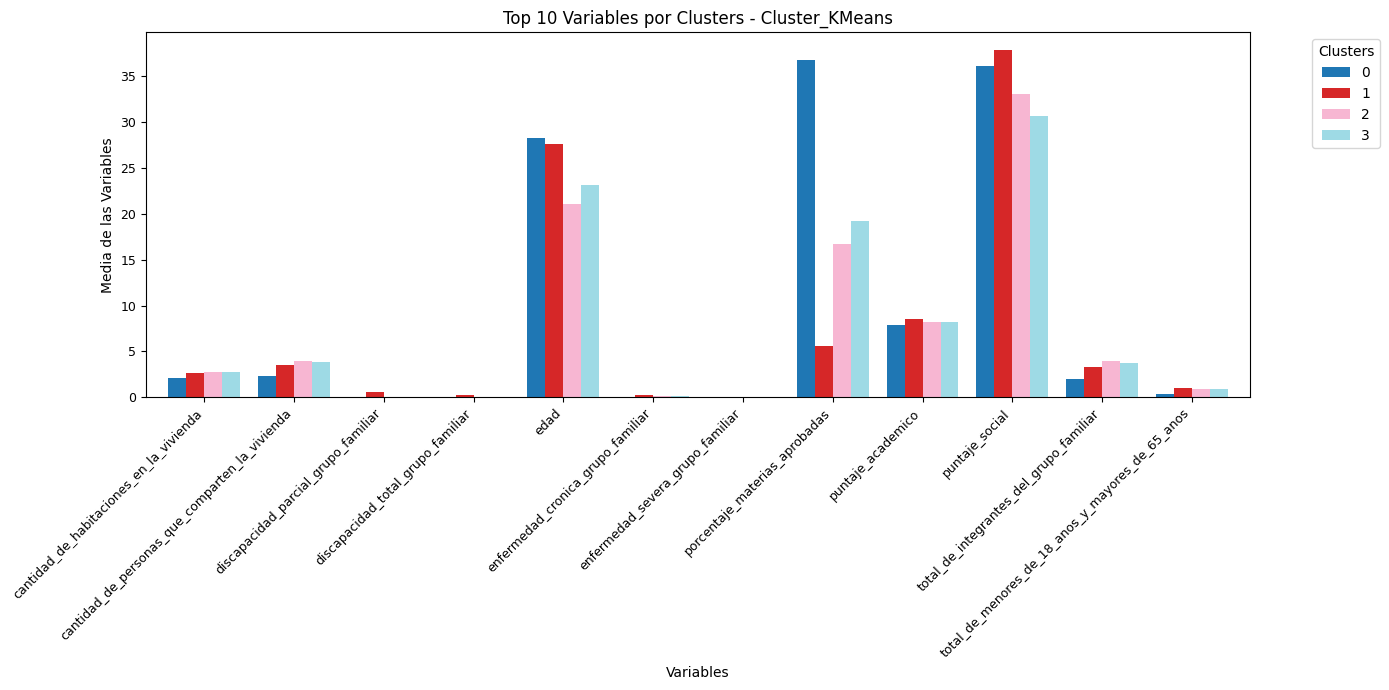

<Figure size 1200x600 with 0 Axes>

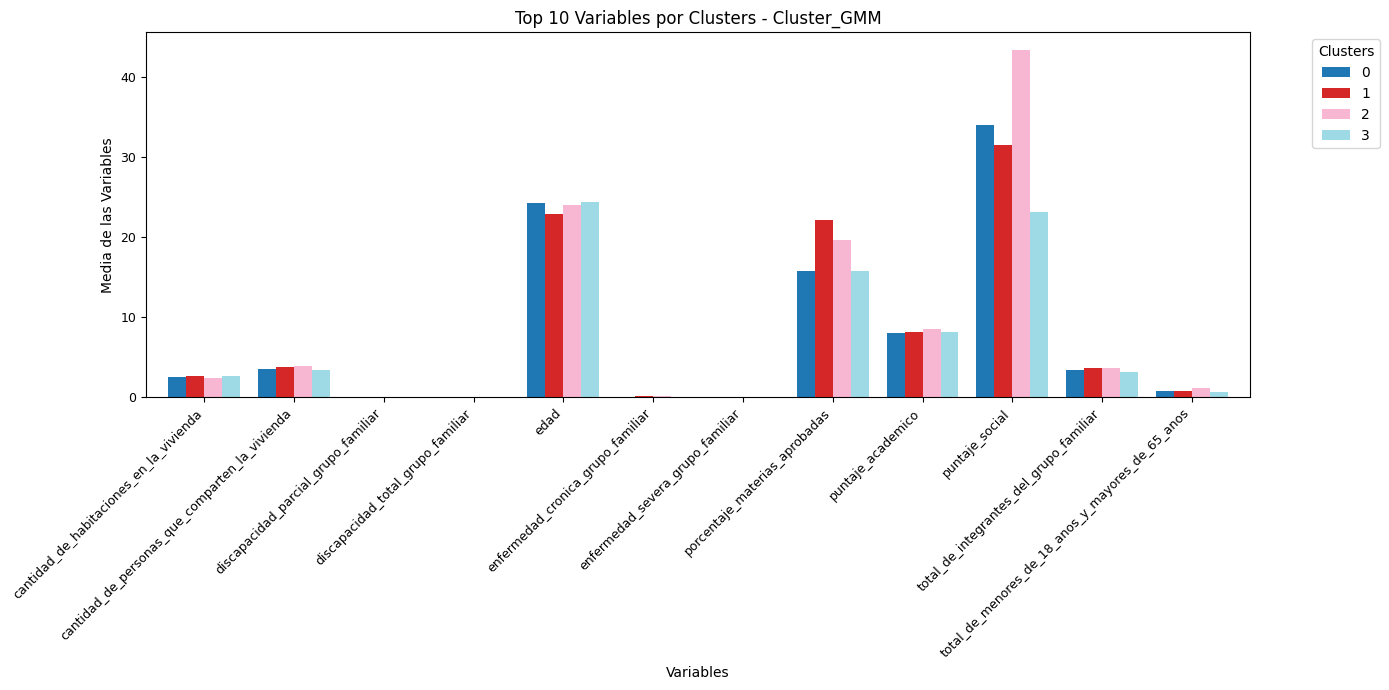

<Figure size 1200x600 with 0 Axes>

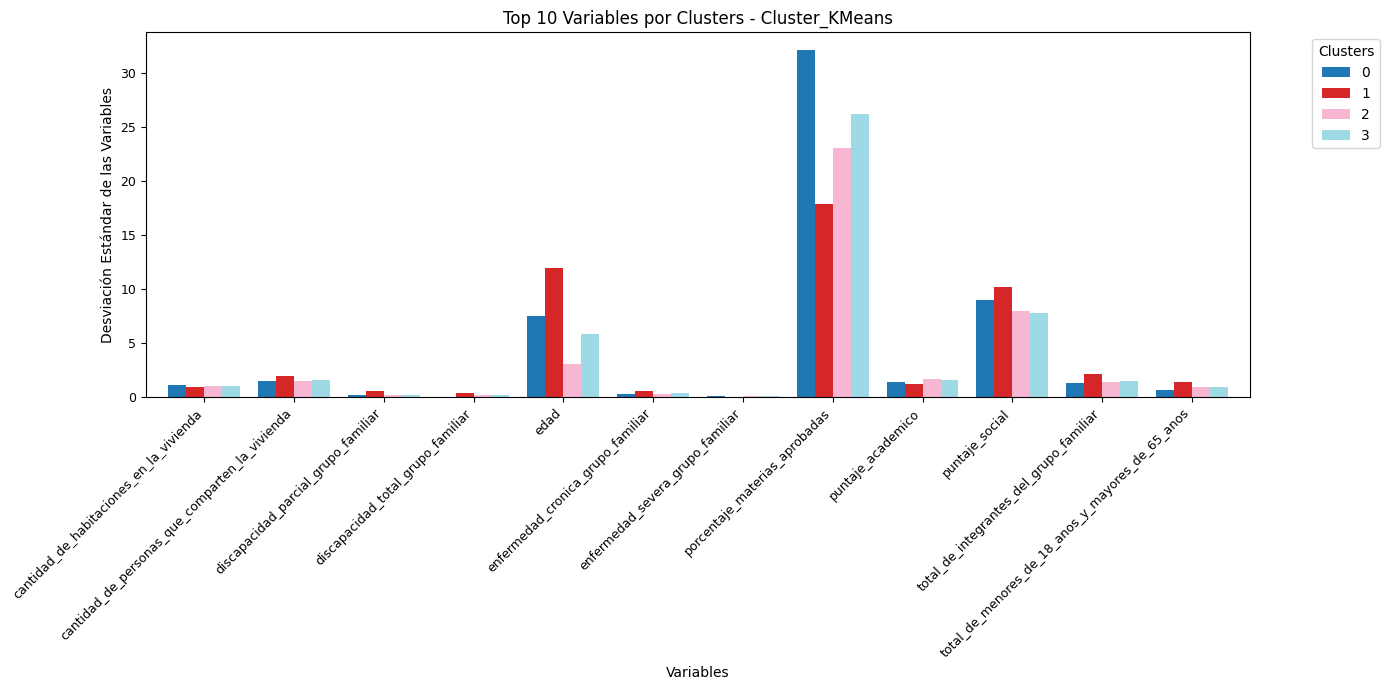

<Figure size 1200x600 with 0 Axes>

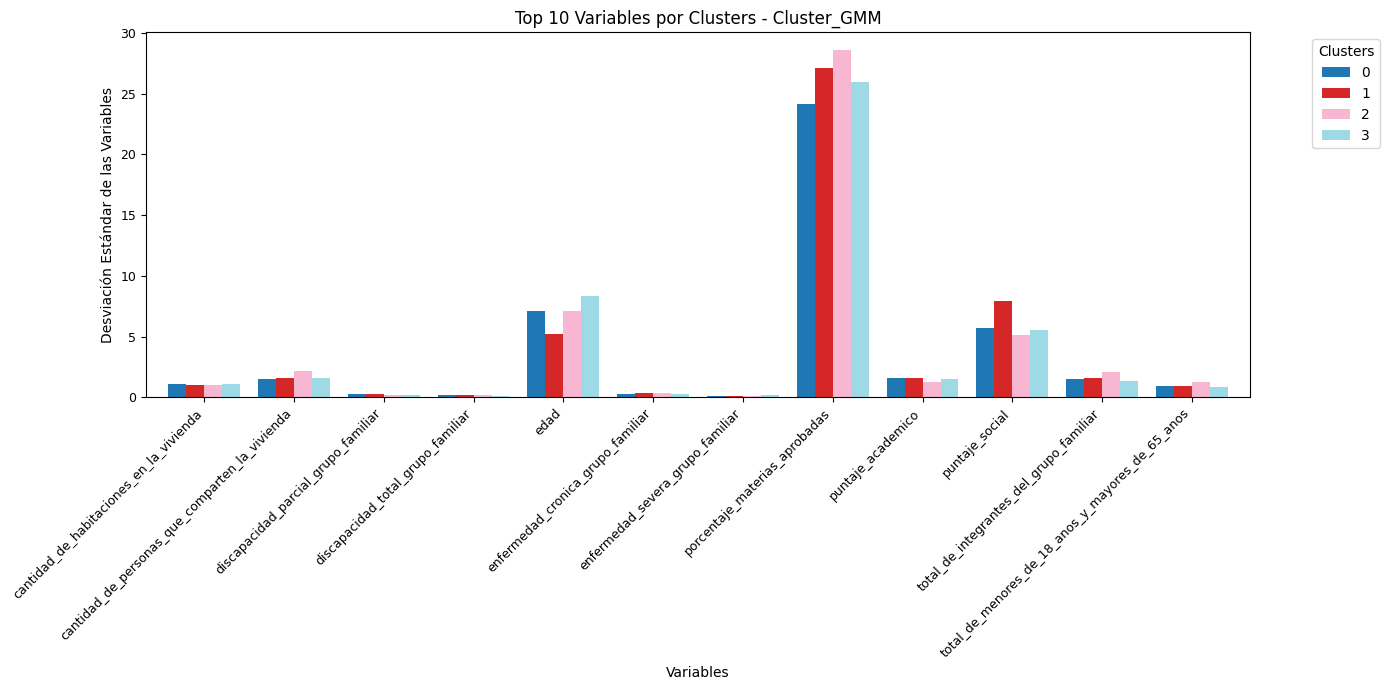

<Figure size 1200x600 with 0 Axes>

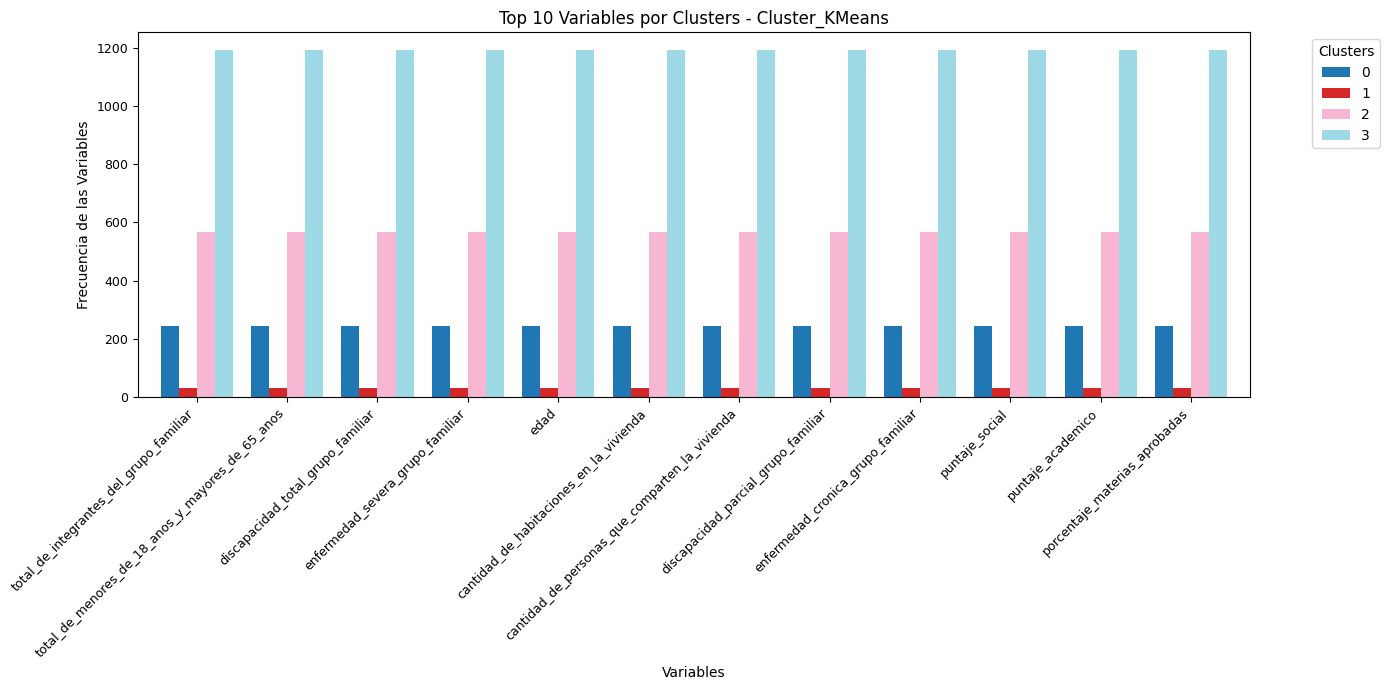

<Figure size 1200x600 with 0 Axes>

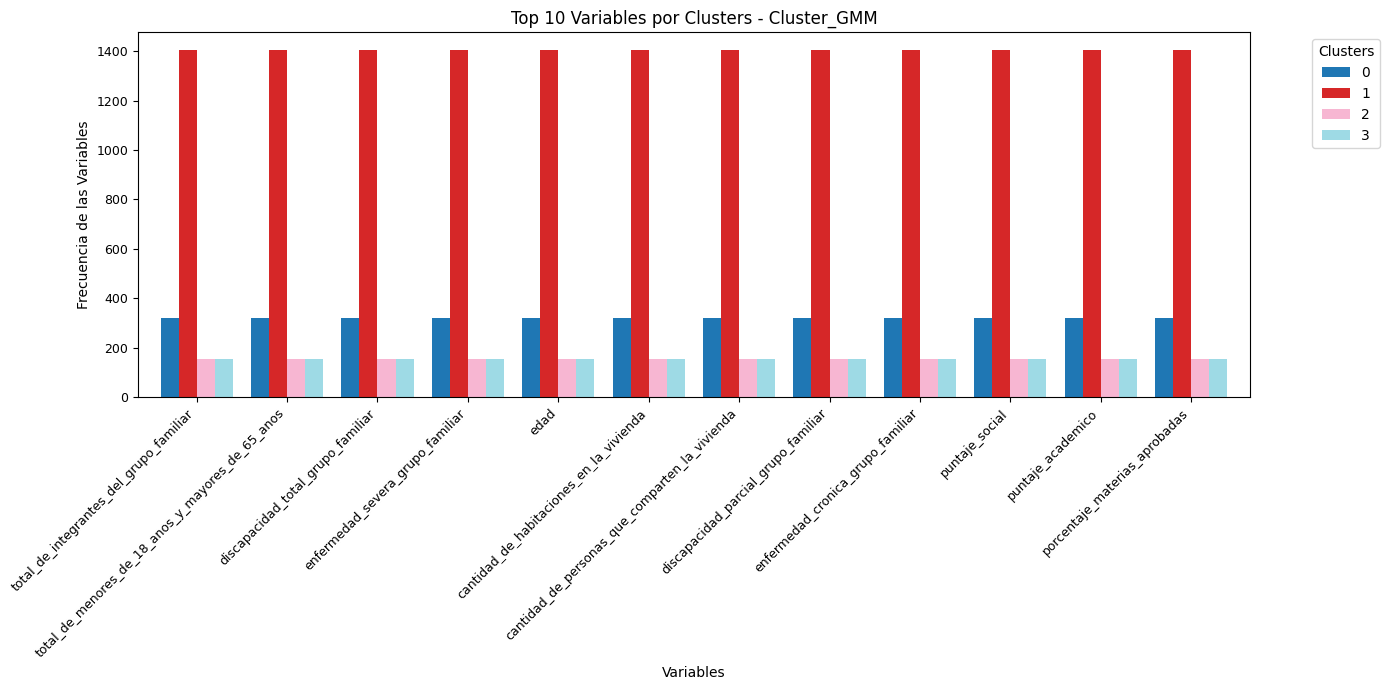

In [246]:
# Seleccionar solo columnas numéricas, excluyendo las de clustering
columns_to_compare = becas.select_dtypes(include=["number"]).drop(columns=cluster_algorithms).columns

# Llamar a la función con diferentes métricas
for mode in ["mean", "std", "freq"]:
    visualizar_modelos(becas, mode, columns_to_compare)

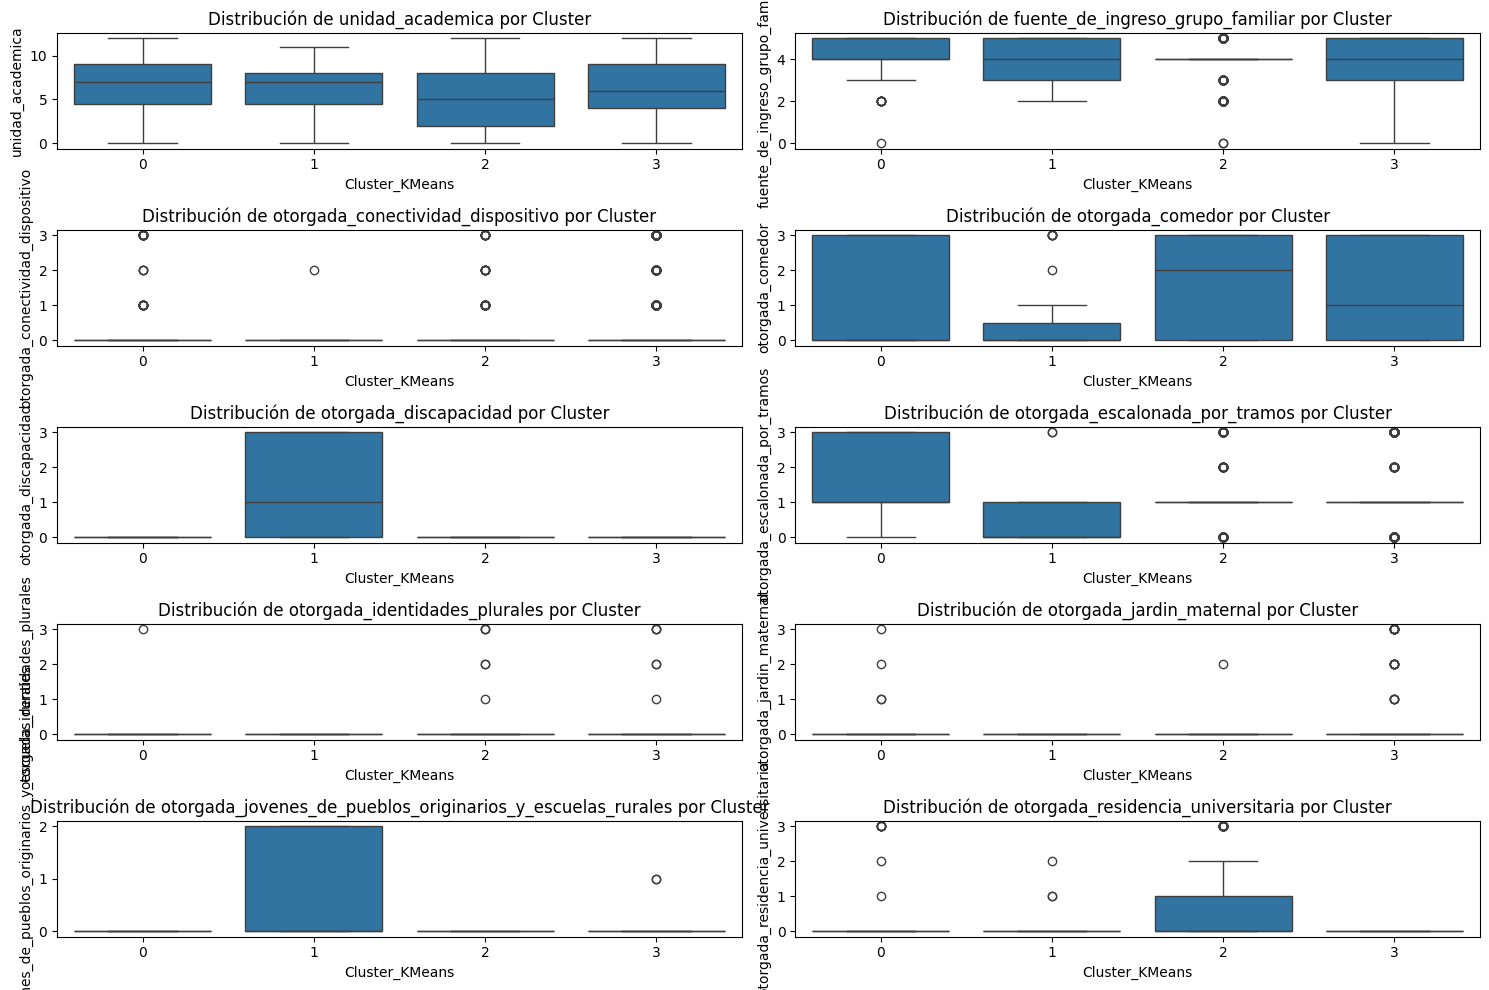

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables numéricas
numeric_columns = df.select_dtypes(include=['number']).columns

# Crear boxplots para las primeras 10 variables numéricas (puedes hacer más gráficos por separado)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns[:10], 1):
    plt.subplot(5, 2, i)
    sns.boxplot(x=df['Cluster_KMeans'], y=df[col])
    plt.title(f'Distribución de {col} por Cluster')
plt.tight_layout()
plt.show()


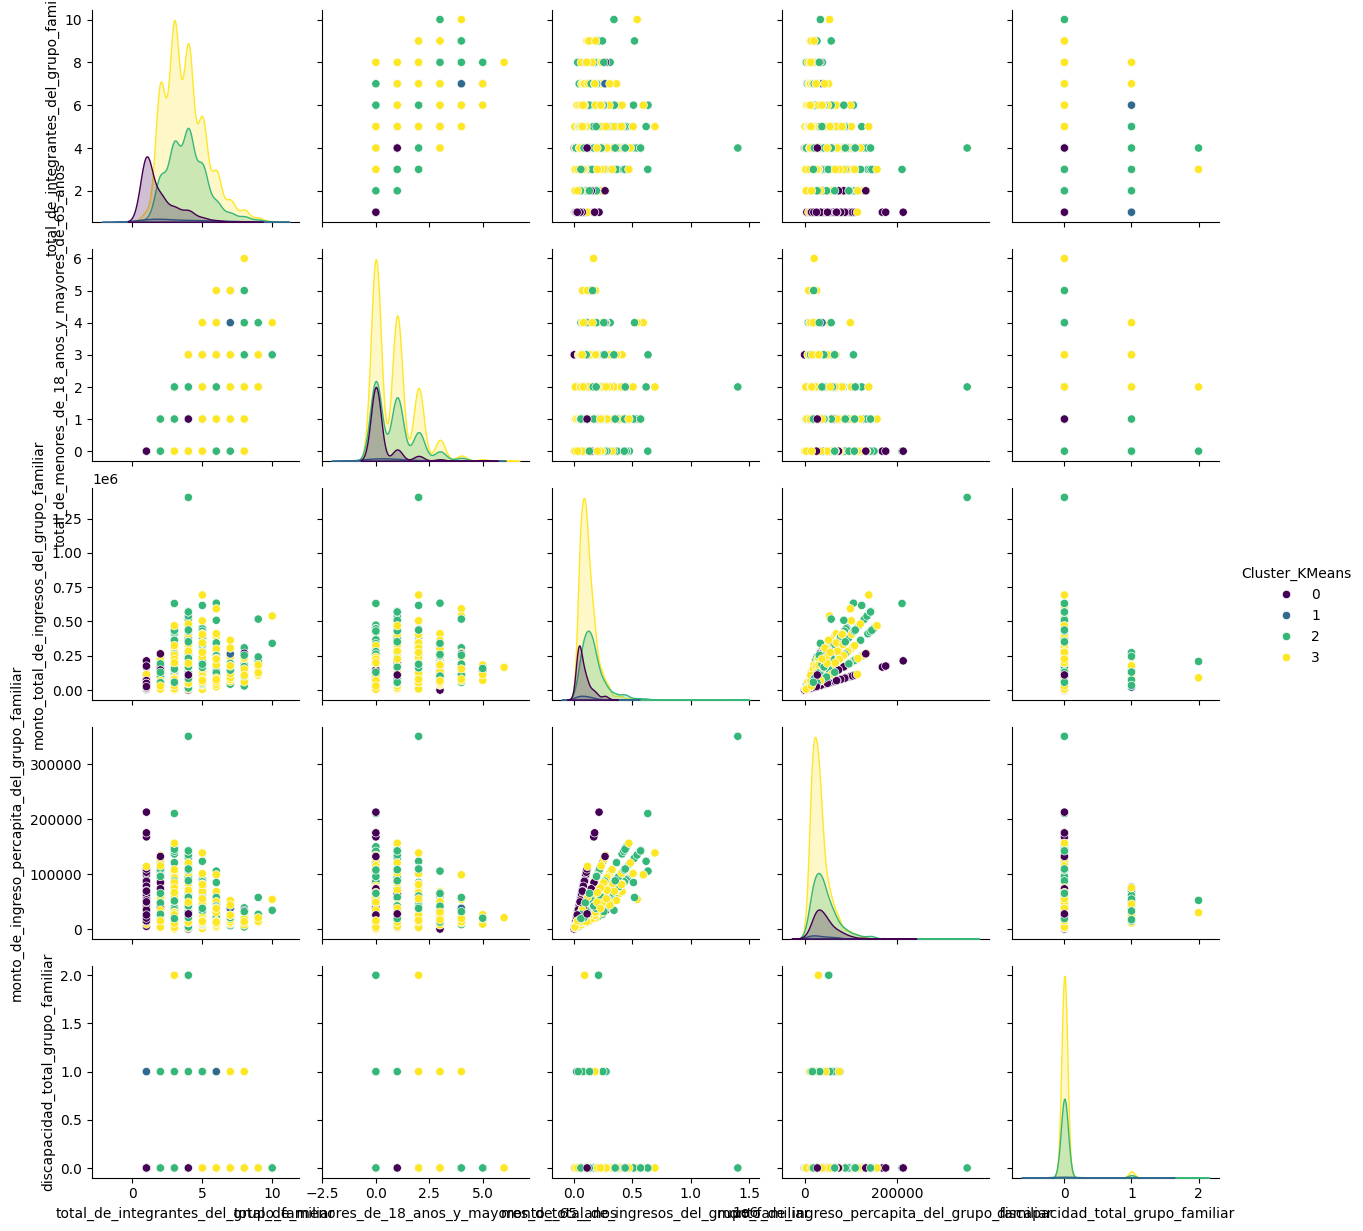

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numeric_columns is derived from the DataFrame used in pairplot (becas)
numeric_columns = becas.select_dtypes(include=['number']).columns

# Filter out non-numeric columns from the selected variables for pairplot
pairplot_vars = [col for col in numeric_columns[:5] if becas[col].dtype in ['int64', 'float64']]

# Generate the pairplot with the filtered variables and hue
sns.pairplot(becas, vars=pairplot_vars, hue='Cluster_KMeans', palette='viridis')
plt.show()

In [273]:
from scipy.stats import chi2_contingency

categorical_cols = becas.select_dtypes(include=['object', 'category']).columns
# from scipy.stats import chi2_contingency

# Contar las frecuencias cruzadas de cada variable categórica y los clusters
for col in categorical_cols:
    # Generar la tabla de contingencia
    contingency_table = pd.crosstab(df['Cluster_KMeans'], df[col])

    # Mostrar la tabla de contingencia para depuración
    print(f"\nTabla de contingencia para {col}:")
    print(contingency_table)

    # Realizar el test de Chi-Cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Imprimir los resultados
    print(f"Chi-Cuadrado para {col}:")
    print(f"   p-value = {p}")

    if p < 0.05:
        print(f"   La variable {col} es significativa para la diferencia entre clusters.")
    else:
        print(f"   La variable {col} no es significativa para la diferencia entre clusters.")



Tabla de contingencia para unidad_academica:
unidad_academica  0   1   2    3   4    5    6    7    8    9    10  11  12
Cluster_KMeans                                                             
0                 25   5  10   15   6   23   35   21   35   24   22  12  10
1                  2   0   2    3   1    2    5    1    9    3    2   1   0
2                 49  19  86   72  27   42   65   52   25   48   37  31  14
3                 75  37  28  135  30  159  141  104  161  118  115  60  30
Chi-Cuadrado para unidad_academica:
   p-value = 8.534042581193222e-23
   La variable unidad_academica es significativa para la diferencia entre clusters.

Tabla de contingencia para fuente_de_ingreso_grupo_familiar:
fuente_de_ingreso_grupo_familiar  0  1    2    3    4    5
Cluster_KMeans                                            
0                                 1  0    8   31   82  121
1                                 0  0    4    6   10   11
2                                 2  0   76  

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráficos de barras para visualizar la distribución de cada variable categórica por cluster
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Cluster', hue=col, data=df)
    plt.title(f'Distribución de {col} por Cluster')
    plt.show()
